In [2]:
from n_mirror_cavity_classes_ter import Mirror, Subcavity, Cavity_sym, Cavity_num
from sympy import Symbol, symbols, Derivative
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
sp.init_printing(use_unicode=True)
sp.init_session(quiet=True)
from scipy.signal import find_peaks, peak_widths
from scipy.interpolate import interp1d
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap


In [3]:
def freq_window(frequencies, phases, f_min=2.5, f_max=2.8):

    frequencies = np.array(frequencies)
    phases = np.array(phases)

    # Mask to apply the frequency window
    mask = (frequencies >= f_min) & (frequencies <= f_max)
    freqs_window = frequencies[mask]
    phases_window = phases[mask]


    phase_min = np.min(phases_window)
    phase_max = np.max(phases_window)
    norm_phase = (phases_window - phase_min) / (phase_max - phase_min)

    idx_95 = np.argmin(np.abs(norm_phase - 0.95))
    idx_05 = np.argmin(np.abs(norm_phase - 0.05))

    f_95 = freqs_window[idx_95]
    f_05 = freqs_window[idx_05]

    spread = np.abs(f_95 - f_05)

    return f_95, f_05, spread

def find_fwhm(frequencies, values, resonance):
    """Finding FWHM given a frequency array and a resonant frequency in Hz"""
    normalized_values = values / np.max(values)
    idx_peak = np.argmin(np.abs(frequencies - resonance))
    left_idx = idx_peak

    half_max = 0.5

    while left_idx > 0 and normalized_values[left_idx] > half_max:
        left_idx -= 1

    right_idx = idx_peak
    while right_idx < len(normalized_values) and normalized_values[right_idx] > half_max:
        right_idx += 1

    fwhm = frequencies[right_idx] - frequencies[left_idx]
    return fwhm, frequencies[right_idx], frequencies[left_idx]


def find_res(freqs, values):
    values = np.array(values).flatten()
    peaks, _ = find_peaks(values)  # Adjust prominence as neede
# Sort peaks by value (prominence or height) and pick the two largest
    if len(peaks) >= 2:
        sorted_indices = np.argsort(values[peaks])[-2:]  # indices of the two highest peaks
        peak_indices = peaks[sorted_indices]
        peak_indices.sort()  # Sort to get left and right in order

        peak_left = freqs[peak_indices[0]]
        peak_right = freqs[peak_indices[1]]

        return peak_left, peak_right

In [4]:
t1, t2, t3 = symbols("t1 t2 t3")

L, delta, omega, L1, L2, delta1, delta2 = symbols("L delta omega L1 L2 delta1 delta2")
subs_dict = [{L: L1, delta: delta1}, {L: L2, delta: delta2}]
mirror_ts = [t1, t2, t3]
lambdify_vars = [omega]

In [ ]:
t1, t2, t3 = symbols("t1 t2 t3")

L, delta, omega, L1, L2, delta1, delta2 = symbols("L delta omega L1 L2 delta1 delta2")
subs_dict = [{L: L1, delta: delta1}, {L: L2, delta: delta2}]
mirror_ts = [t1, t2, t3]
lambdify_vars = [omega]
nu_range = np.linspace(-100e6, 100e6, 100000)
t1_fixed = 0.1
t2_fixed = 0.1
t3_fixed = 0.1
t_range = np.linspace(50e-6, 0.1, 5)
cavity = Cavity_num([t1_fixed, t2_fixed, t3_fixed], 
                            {L1: 0.5, delta1: 0, L2: 0.5, delta2: -532e-9/2}, 
                            subs_dict, 
                            {L1: 0.5, delta1: 0, L2: 0.5, delta2:-532e-9/2}, 
                            [omega])

ranges, values = cavity.transmitted_power_no_comp([nu_range])

281799749.92049915
281799884.83784837


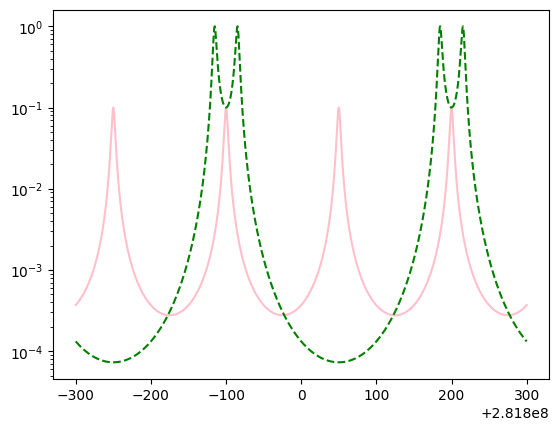

In [607]:
dL1 = 20e-6
dL2 = 20e-6
L1_fixed = 0.5
L2_fixed = 0.5
L1_fixed1 =L1_fixed + dL1
L2_fixed2 = L2_fixed + dL2
laser_freq = 2.818e14
nu_range = np.linspace(laser_freq - 300e6, laser_freq + 300e6, 100000)


t1, t2, t3 = symbols("t1 t2 t3")

L, delta, omega, L1, L2, delta1, delta2 = symbols("L delta omega L1 L2 delta1 delta2")
subs_dict = [{L: L1, delta: delta1}, {L: L2, delta: delta2}]
mirror_ts = [t1, t2, t3]
lambdify_vars = [omega]
cavity = Cavity_num([t1_fixed, t2_fixed, t3_fixed], 
                            {L1: 0.5, delta1: 0, L2: 0.5, delta2: -532e-9/2}, 
                            subs_dict, 
                            {L1: 0.5, delta1: 0, L2: 0.5, delta2:-532e-9/2}, 
                            [omega])

ranges, values = cavity.transmitted_power_no_comp([nu_range])
left_peak, right_peak = find_res(ranges/ (2 * np.pi) * 1e-6, values)
fwhm, right, left = find_fwhm(ranges / (2 * np.pi) * 1e-6, values, left_peak)
print(left_peak)
plt.plot((ranges / (2 * np.pi)) * 1e-6, values, c= "pink")

cavity = Cavity_num([t1_fixed, t2_fixed, t3_fixed], 
                            {L1: 0.5, delta1: 0, L2: 0.5, delta2: 0}, 
                            subs_dict, 
                            {L1: 0.5, delta1: 0, L2: 0.5, delta2: 0}, 
                            [omega])

ranges, values = cavity.transmitted_power_no_comp([nu_range])
left_peak, right_peak = find_res(ranges/ (2 * np.pi) * 1e-6, values)
fwhm, right, left = find_fwhm(ranges / (2 * np.pi) * 1e-6, values, left_peak)
print(left_peak)
plt.plot((ranges / (2 * np.pi)) * 1e-6, values, c= "green", linestyle = "dashed")

plt.yscale("log")

In [ ]:
281799884.75534755 - 281799884.83634835

In [546]:
print(281799884.8376348 - 281800182.002432)

-297.1647971868515


FWHM of first peak: 4.673 MHz


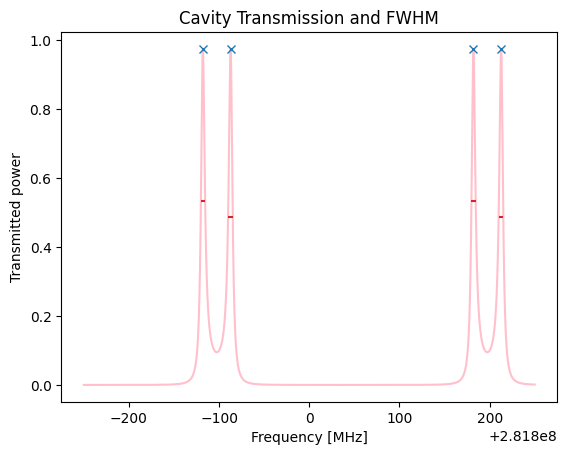

In [547]:
freqs_hz = ranges / (2 * np.pi)

# Find peaks above threshold
peaks, _ = find_peaks(values, height=0.0004)

# Compute FWHM in index units
results_half = peak_widths(values, peaks, rel_height=0.5)

# Convert index-widths to Hz
delta_f_hz = (freqs_hz[1] - freqs_hz[0])  # spacing between freq samples
fwhm_hz = results_half[0] * delta_f_hz

# Convert to MHz
fwhm_mhz = fwhm_hz * 1e-6

# Plot peaks and FWHM markers
plt.plot(freqs_hz * 1e-6, values, c="pink")  # x-axis in MHz
plt.plot(freqs_hz[peaks] * 1e-6, values[peaks], "x")

for i in range(len(peaks)):
    x_start = freqs_hz[int(results_half[2][i])]
    x_end = freqs_hz[int(results_half[3][i])]
    y_level = results_half[1][i]
    plt.hlines(y_level, x_start * 1e-6, x_end * 1e-6, color="C3")

# Print FWHM for first peak
print(f"FWHM of first peak: {fwhm_mhz[0]:.3f} MHz")

plt.xlabel("Frequency [MHz]")
plt.ylabel("Transmitted power")
plt.title("Cavity Transmission and FWHM")
plt.show()


In [548]:
print(right_peak-left_peak)

30.758530735969543


In [549]:
dL_range = np.linspace(0, 1500e-9, 10)

fwhm_arr = []
finess_arr = []
t1_fixed = 0.1
t2_fixed = 0.1
t3_fixed = 0.1


for dL in dL_range:
    cavity = Cavity_num([t1_fixed, t2_fixed, t3_fixed], 
                            {L1: 0.5, delta1: 0, L2: 0.5, delta2: -dL}, 
                            subs_dict, 
                            {L1: 0.5, delta1: 0, L2: 0.5, delta2: -dL}, 
                            [omega])

    ranges, values= cavity.transmitted_power_no_comp([nu_range])
    left_peak, right_peak = find_res(ranges/ (2 * np.pi) * 1e-6, values)
    fwhm, right, left = find_fwhm(ranges / (2 * np.pi) * 1e-6, values, left_peak)
    # fsr = 3e8 / (2 * (0.5 - dL))
    fsr =((0.5-dL) / 0.5) * np.pi % np.pi
    fwhm_arr.append(fwhm)
    finess = fsr/(fwhm * 1e6)
    finess_arr.append(finess)

plt.scatter(dL_range, finess_arr)

KeyboardInterrupt: 

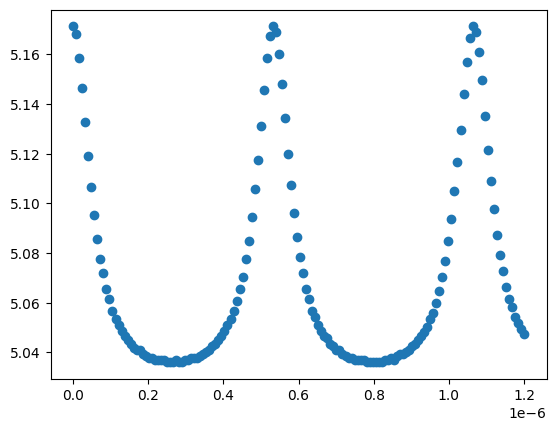

In [ ]:
plt.scatter(dL_range, fwhm_arr)

In [562]:
t1, t2 = symbols("t1 t2")

L, delta, omega, L1, delta1 = symbols("L delta omega L1 delta1")
subs_dict = [{L: L1, delta: delta1}]
mirror_ts = [t1, t2]
lambdify_vars = [omega]

nu_range = np.linspace(-300e6, 300e6, 100000)
t1_fixed =  0.1
t2_fixed = 0.1
t3_fixed = 0.1
t_range = np.linspace(50e-6, 0.1, 5)

dL1 = 20e-6
dL2 = 20e-6
L1_fixed = 0.5
L2_fixed = 0.5
L1_fixed1 =L1_fixed + dL1
L2_fixed2 = L2_fixed + dL2
laser_freq = 2.818e14
nu_range = np.linspace(laser_freq-400e6, laser_freq+400e6, 100000)
nu_range = np.linspace(0, 1600e6, 100000)




cavity = Cavity_num([t1_fixed, t2_fixed], 
                            {L1: 0.5, delta1: 0}, 
                            subs_dict, 
                            {L1: 0.5, delta1: 0}, 
                            [omega])

Text(0.5, 1.0, '2 mirror reflected power')

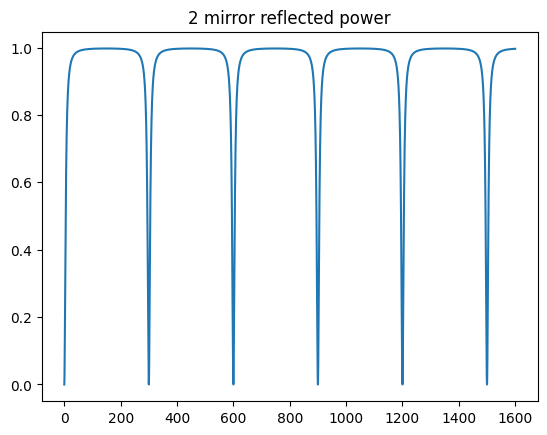

In [561]:
ranges, values= cavity.transmitted_power_no_comp([nu_range])
reflected_power = 1-values
plt.plot(ranges / (2 * np.pi) * 1e-6, reflected_power)
plt.title("2 mirror reflected power")

C:\Users\HP\AppData\Local\Temp\ipykernel_19164\4065575575.py:2: RuntimeWarning: divide by zero encountered in log
  finess = (2 * np.pi) / (- np.log(reflected_power * 0.9))


Text(0.5, 1.0, 'Finess vs frequency')

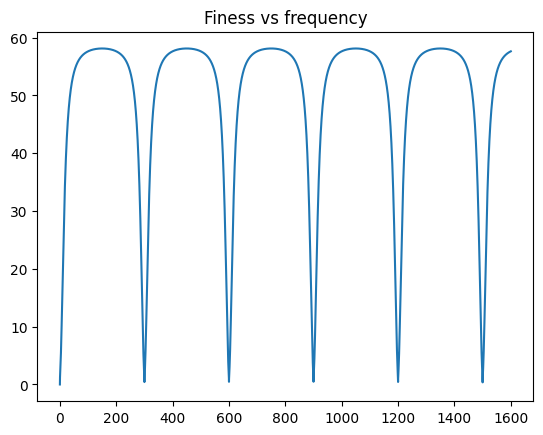

In [559]:
# finess = (np.pi * (reflected_power * 0.9) ** (1/4)) / (1 - np.sqrt(reflected_power * 0.9))
finess = (2 * np.pi) / (- np.log(reflected_power * 0.9))
plt.plot(ranges / (2 * np.pi) * 1e-6, finess)
plt.title("Finess vs frequency")

# is this true though? seems to be oversimplified 

In [601]:
finesse_vals = []

for dL in dL_range:
    cavity = Cavity_num(
        [t1_fixed, t2_fixed, t3_fixed],
        {L1: L1_fixed, delta1: 0, L2: L2_fixed, delta2: -dL},
        subs_dict,
        {L1: L1_fixed, delta1: 0, L2: L2_fixed, delta2: -dL},
        [omega]
    )

    freqs, transmission = cavity.transmitted_power_no_comp([nu_range])
    
    peaks, _ = find_peaks(transmission)
    if len(peaks) < 3:
        finesse_vals.append(np.nan)
        continue

    # Get peak indices
    idx_1 = peaks[0]
    idx_3 = peaks[2]
    
    # FSR as spacing between outer peaks
    nu_1 = freqs[idx_1]
    nu_3 = freqs[idx_3]
    fsr = np.abs(nu_3 - nu_1)
    
    # FWHM from peak 1
    fwhm_widths, _, _, _ = peak_widths(transmission, peaks, rel_height=0.5)
    fwhm = fwhm_widths[0] * (freqs[1] - freqs[0])  # width in Hz

    finesse = fsr / fwhm
    finesse_vals.append(finesse)


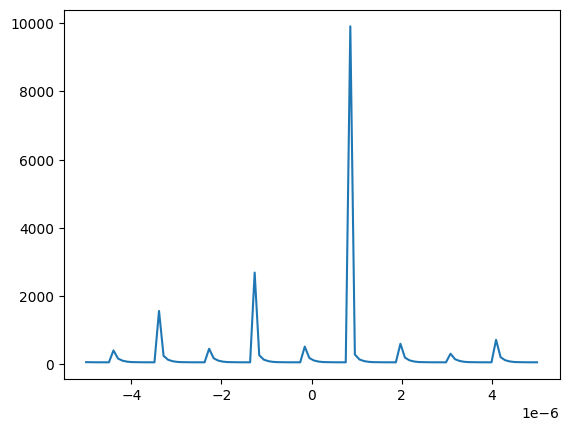

In [606]:
plt.plot(dl_range, finesse_vals)

#### assuming the model above is true one can replicate this for the lkb case

In [ ]:
t1, t2 = symbols("t1 t2")

L, delta, omega, L1, delta1 = symbols("L delta omega L1 delta1")
subs_dict = [{L: L1, delta: delta1}]
mirror_ts = [t1, t2]
lambdify_vars = [omega]

nu_range = np.linspace(-300e6, 300e6, 100000)
t1_fixed = 4000e-6
t2_fixed = 1000e-6
t3_fixed = 0.1
t_range = np.linspace(50e-6, 0.1, 5)

dL1 = 20e-6
dL2 = 20e-6
L1_fixed = 0.5
L2_fixed = 0.5
L1_fixed1 = L1_fixed + dL1
L2_fixed2 = L2_fixed + dL2
laser_freq = 2.818e14
nu_range = np.linspace(laser_freq-400e6, laser_freq+400e6, 100000)



cavity = Cavity_num([t1_fixed, t2_fixed], 
                            {L1: 0.25, delta1: 0}, 
                            subs_dict, 
                            {L1: 0.25, delta1: 0}, 
                            [omega])

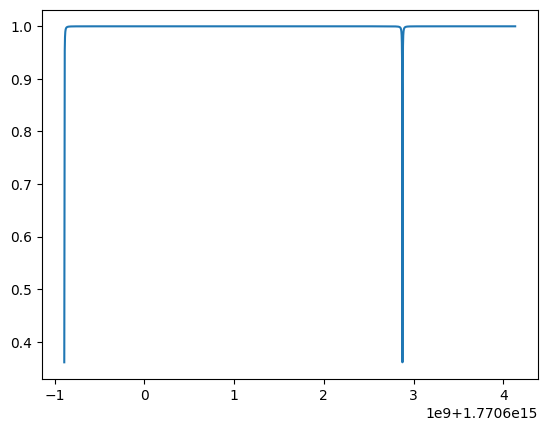

In [ ]:
ranges, values = cavity.transmitted_power_no_comp([nu_range])
reflected_power = 1-values
plt.plot(ranges, reflected_power)

Text(0.5, 0, 'Frequency [MHz]')

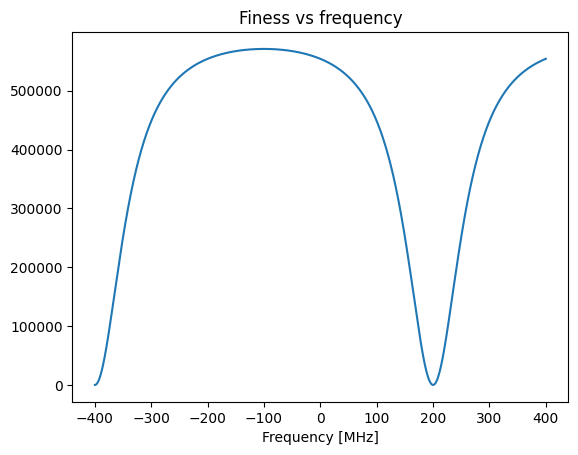

In [ ]:
# finess = (np.pi * (reflected_power * 0.9) ** (1/4)) / (1 - np.sqrt(reflected_power * 0.9))
finess = (2 * np.pi) / (- np.log(reflected_power * 0.99999))
plt.plot((ranges / (2 * np.pi) - 2.818e14) * 1e-6, finess)
plt.title("Finess vs frequency")
plt.xlabel("Frequency [MHz]")
# plt.xlim([190, 210])


Text(0.5, 1.0, 'Plot 2a')

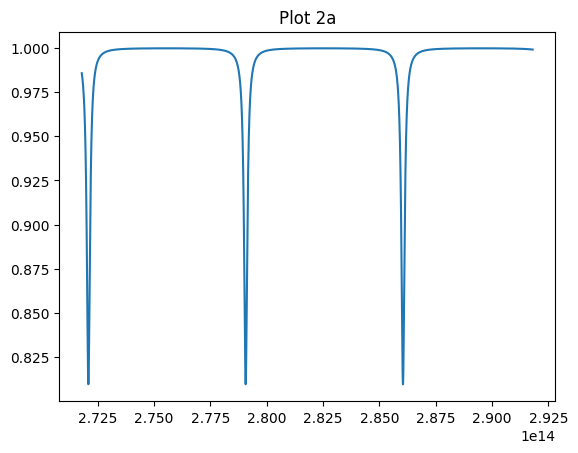

In [ ]:
t1, t2 = symbols("t1 t2")

L, delta, omega, L1, delta1 = symbols("L delta omega L1 delta1")
subs_dict = [{L: L1, delta: delta1}]
mirror_ts = [t1, t2]
lambdify_vars = [omega]

nu_range = np.linspace(-300e6, 300e6, 100000)
t1_fixed = 0.0075
t2_fixed = 0.133
t3_fixed = 1e-6
t_range = np.linspace(50e-6, 0.1, 5)

dL1 = 20e-6
dL2 = 20e-6
L1_fixed = 0.5
L2_fixed = 0.5
L1_fixed1 =L1_fixed + dL1
L2_fixed2 = L2_fixed + dL2
laser_freq = 2.818e14
nu_range = np.linspace(laser_freq-10000e9, laser_freq+10000e9, 100000)


cavity = Cavity_num([t1_fixed, t2_fixed], 
                            {L1:21.5e-6, delta1: 0}, 
                            subs_dict, 
                            {L1: 21.5e-6, delta1: 0}, 
                            [omega])

ranges, values = cavity.transmitted_power_no_comp([nu_range])
reflected_power = 1-values

plt.plot(ranges / (2 * np.pi) , reflected_power)
# plt.xlim(-69550, -69530)

plt.title("Plot 2a")

Text(0.5, 1.0, 'Finess, copying paper')

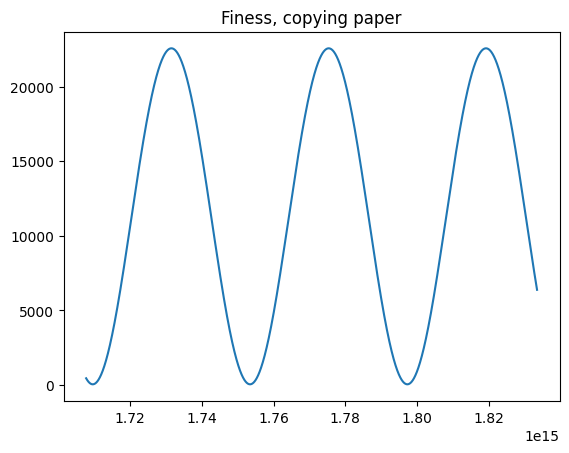

In [ ]:
# kappa = (np.pi * c) /( 2 * L * finesse)
kappa_arr = []
dL_range = np.linspace(0, 1.5e-6, 100000)
Ls_arr = dL_range + 1
finesse = (2 * np.pi) / (- np.log(reflected_power * 0.99999))

plt.plot(ranges, finesse)
plt.title("Finess, copying paper")

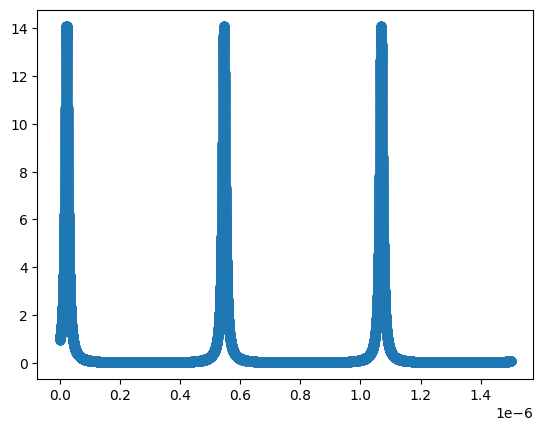

In [ ]:
for f, L in zip(finesse, Ls_arr):
    kappa_arr.append((((np.pi * 3e8) /( 2 * L * f)) * 2 * L) / (3e8 * 0.0075 ))

plt.scatter(dL_range, kappa_arr)

In [5]:
t1_fixed = 0.1
t2_fixed = 0.1
t3_fixed = 0.1
resonance = []
dL_range = np.linspace(0, 5e-6, 10)
t1, t2, t3 = symbols("t1 t2 t3")

L, delta, omega, L1, L2, delta1, delta2 = symbols("L delta omega L1 L2 delta1 delta2")
subs_dict = [{L: L1, delta: delta1}, {L: L2, delta: delta2}]
mirror_ts = [t1, t2, t3]
lambdify_vars = [omega]

nu_range = np.linspace(-1000e6, 1000e6, 100000)

for dL in dL_range:
    cavity = Cavity_num([t1_fixed, t2_fixed, t3_fixed], 
                                {L1: 0.5, delta1: 0, L2: 0.5, delta2: -dL}, 
                                subs_dict, 
                                {L1: 0.5, delta1: 0, L2: 0.5, delta2: -dL}, 
                                [omega])
    ranges, values = cavity.transmitted_power_no_comp([nu_range])
    peak_indices, _ = find_peaks(values)
    peak_frequencies = ranges[peak_indices] 
    peak_frequencies_Hz = peak_frequencies / (2 * np.pi)
    resonance.append(peak_frequencies_Hz[0])

dnu_dL = np.gradient(resonance, dL_range)



KeyboardInterrupt: 

In [ ]:
delta_nu = 5e4  # 100 kHz

# Get the derivative at dL = 0 (or near zero)
idx_zero = np.argmin(np.abs(dL_range))
dnu_dL_at_zero = dnu_dL[idx_zero]  # units: Hz/m

# Now compute Delta L
delta_L = delta_nu / dnu_dL_at_zero  # isn meters

print(f"To get a Δν = {delta_nu/1e3:.1f} kHz shift, move the mirror by ΔL = {delta_L*1e6:.2f} µm")


To get a Δν = 50.0 kHz shift, move the mirror by ΔL = inf µm


C:\Users\HP\AppData\Local\Temp\ipykernel_19164\1734679070.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  delta_L = delta_nu / dnu_dL_at_zero  # isn meters


# here starts the part w/ varying dL

In [5]:
omega, delta1, delta2, L1, L2 = symbols("omega delta1 delta2 L1 L2")
mirror_tr = [0.1, 0.1, 0.1]
subs_dict = [
    {L: L1, delta: delta1},  
    {L: L2, delta: delta2}   
]


cavity_sym = Cavity_sym(mirror_tr, subs_dict)

In [6]:
def make_length_resonant(input_length, wavelength):
    m = round(2 * input_length / wavelength)
    resonant_length = m * (wavelength / 2)
    return resonant_length
def make_length_antiresonant(input_length, wavelength):
    quarter_lambda = wavelength / 4
    # compute the index n such that L = n * quarter_lambda, where n is odd
    n = round(input_length / quarter_lambda)

    # ensure n is odd
    if n % 2 == 0:
        # choose the closer odd number
        n_up = n + 1
        n_down = n - 1
        if abs(n_up * quarter_lambda - input_length) < abs(n_down * quarter_lambda - input_length):
            n = n_up
        else:
            n = n_down

    return n * quarter_lambda


In [7]:
transmitted_power = cavity_sym.transmitted_power
transmitted_power_expr = transmitted_power()

In [68]:
length_res = make_length_resonant(0.5, 1064e-9)
length_antires = make_length_antiresonant(0.5, 1064e-9)

substitutions = {
    L1: length_res,
    delta1: 0,
    L2: length_res ,
    omega:2 * np.pi * 299_792_458 / 1064e-9
}
omega_0 = 3e8/1064e-9 * (2 * np.pi) 
subbed_expr = transmitted_power_expr.subs(substitutions)


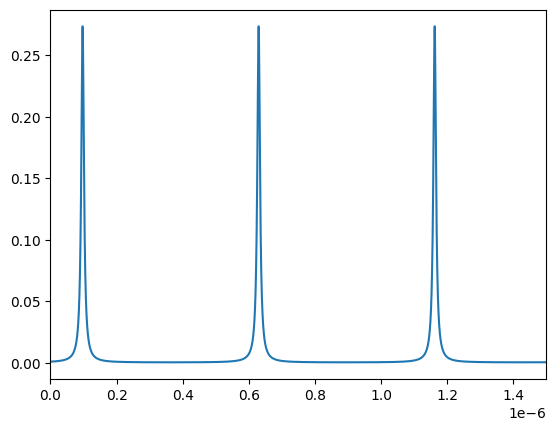

In [ ]:
function = sp.lambdify(delta2, subbed_expr)
delta2_vals = np.linspace(-1500e-9, 2500e-9, 1000000)

power_values = function(delta2_vals)
plt.plot(delta2_vals, power_values)
plt.xlim(0, 1.5e-6)

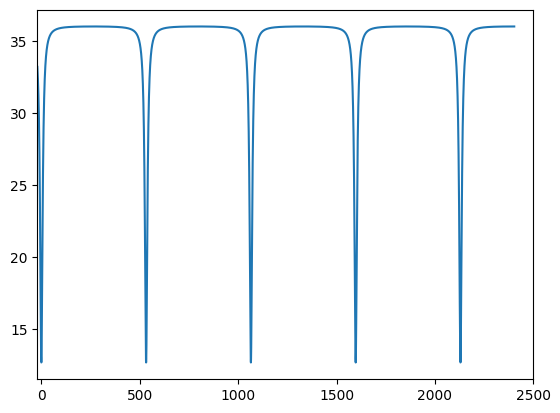

In [81]:
reflected_power = 1-power_values
finesse = (2 * np.pi) / (- np.log(reflected_power * 0.84))
# finesse = (np.pi * np.sqrt(reflected_power * 0.84)) / (1 - reflected_power * 0.84)
plt.plot(delta2_vals * 1e9 - 97, finesse)
plt.xlim(-20, 2500)

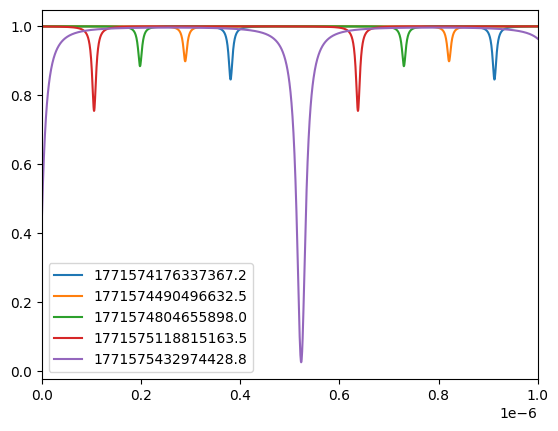

In [201]:
omega_range = np.linspace(omega_0 - (100e6 * 2 * np.pi), omega_0 + (100e6 * 2 * np.pi), 5)
for om in omega_range: 
    substitutions = {
        L1: 0.5,
        delta1: 0,
        L2: 0.5,
        omega: om
    }
    subbed_expr = transmitted_power_expr.subs(substitutions)
    function = sp.lambdify(delta2, subbed_expr)
    delta2_vals = np.linspace(0, 5e-6, 10000)

    power_values = function(delta2_vals)
    plt.plot(delta2_vals, 1-power_values, label = om)

plt.legend()
plt.xlim(0, 1e-6)

In [13]:
reflected_power = 1 - power_values
finesse = (2 * np.pi) / (- np.log(reflected_power * 0.9))

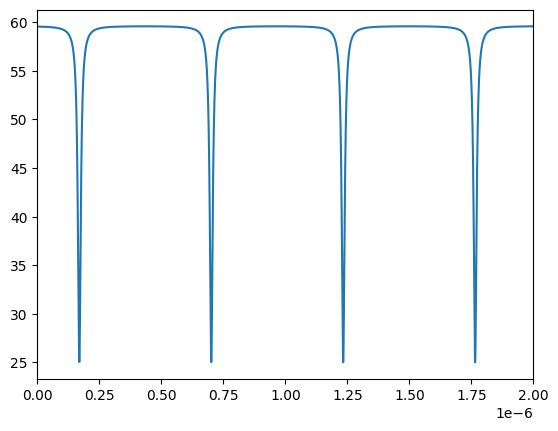

In [14]:
plt.plot(delta2_vals, finesse)
plt.xlim(0, 2000e-9)
plt.show()

In [26]:
omega, delta1, delta2, L1, L2 = symbols("omega delta1 delta2 L1 L2")
mirror_tr = [4000e-6, 1000e-6, 1 - 0.99999]
subs_dict = [
    {L: L1, delta: delta1},  
    {L: L2, delta: delta2}   
]


cavity_sym = Cavity_sym(mirror_tr, subs_dict)
transmitted_power = cavity_sym.transmitted_power
transmitted_power_expr = transmitted_power()

substitutions = {
    L1: 0.25,
    delta1: 0,
    L2: 0.25,
    omega: omega_0
}

subbed_expr = transmitted_power_expr.subs(substitutions)

function = sp.lambdify(delta2, subbed_expr)
delta2_vals = np.linspace(0, 5e-6, 10000)

power_values = function(delta2_vals)

reflected_power = 1 - power_values
finesse = (2 * np.pi) / (- np.log(reflected_power * 0.99999))

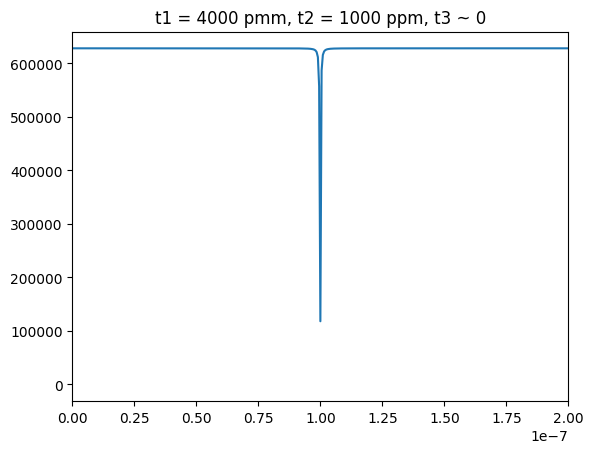

In [27]:
plt.plot(delta2_vals, finesse)
plt.xlim(0, 200e-9)
plt.title("t1 = 4000 pmm, t2 = 1000 ppm, t3 ~ 0")
plt.show()

In [702]:
omega, delta1, delta2, L1, L2 = symbols("omega delta1 delta2 L1 L2")
mirror_tr = [4000e-6, 4000e-6, 1e-6]
subs_dict = [
    {L: L1, delta: delta1},  
    {L: L2, delta: delta2}   
]


cavity_sym = Cavity_sym(mirror_tr, subs_dict)
transmitted_power = cavity_sym.transmitted_power
transmitted_power_expr = transmitted_power()

substitutions = {
    L1: 0.25,
    delta1: 0,
    L2: 0.25,
    omega: omega_0
}

subbed_expr = transmitted_power_expr.subs(substitutions)

function = sp.lambdify(delta2, subbed_expr)
delta2_vals = np.linspace(0, 5e-6, 10000)

power_values = function(delta2_vals)

reflected_power = 1 - power_values
finesse = (2 * np.pi) / (- np.log(reflected_power * 0.99999999))

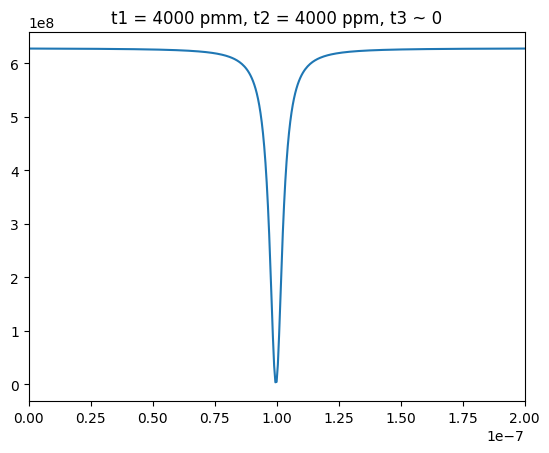

In [704]:
plt.plot(delta2_vals, finesse)
plt.xlim(0, 200e-9)
plt.title("t1 = 4000 pmm, t2 = 4000 ppm, t3 ~ 0")
plt.show()

In [705]:
omega, delta1, delta2, L1, L2 = symbols("omega delta1 delta2 L1 L2")
mirror_tr = [1000e-6, 4000e-6, 1e-6]
subs_dict = [
    {L: L1, delta: delta1},  
    {L: L2, delta: delta2}   
]


cavity_sym = Cavity_sym(mirror_tr, subs_dict)
transmitted_power = cavity_sym.transmitted_power
transmitted_power_expr = transmitted_power()

substitutions = {
    L1: 0.25,
    delta1: 0,
    L2: 0.25,
    omega: omega_0
}

subbed_expr = transmitted_power_expr.subs(substitutions)

function = sp.lambdify(delta2, subbed_expr)
delta2_vals = np.linspace(0, 5e-6, 10000)

power_values = function(delta2_vals)

reflected_power = 1 - power_values
finesse = (2 * np.pi) / (- np.log(reflected_power * 0.99999999))

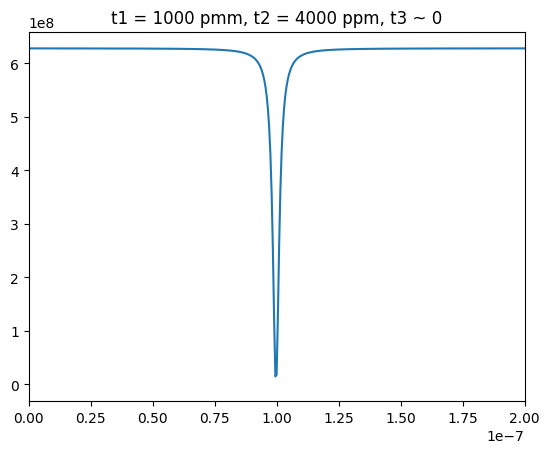

In [709]:
plt.plot(delta2_vals, finesse)
plt.xlim(0, 200e-9)
plt.title("t1 = 1000 pmm, t2 = 4000 ppm, t3 ~ 0")
plt.show()

In [ ]:
t1, t2, t3 = symbols("t1 t2 t3")

L, delta, omega, L1, L2, delta1, delta2 = symbols("L delta omega L1 L2 delta1 delta2")
subs_dict = [{L: L1, delta: delta1}, {L: L2, delta: delta2}]
mirror_ts = [t1, t2, t3]
lambdify_vars = [omega]
nu_range = np.linspace(-500e6, 500e6, 1000000)
t1_fixed = 0.1
t2_fixed = 0.1
t3_fixed = 1e-6
cavity = Cavity_num([t1_fixed, t2_fixed, t3_fixed], 
                            {L1: 0.5-20e-6, delta1: 0, L2: 20e-6 +10e-6 , delta2: 0},
                            subs_dict, 
                            {L1: 0.5-20e-6, delta1: 0, L2: 20e-6 + 10e-6, delta2: 0}, 
                            [omega])

ranges, values = cavity.transmitted_power_no_comp([nu_range])

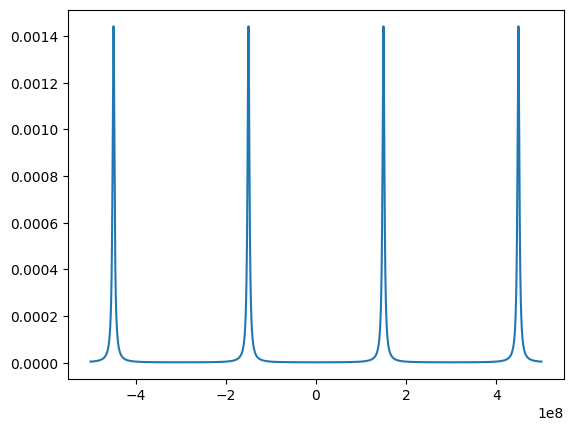

In [141]:
plt.plot(ranges / (2*np.pi), values)
# plt.xlim(-2e6, -1e6)

In [ ]:
# fwhm as a function dL
# finesse fsr / fwhm

In [ ]:
t1, t2, t3 = symbols("t1 t2 t3")

L, delta, omega, L1, L2, delta1, delta2 = symbols("L delta omega L1 L2 delta1 delta2")
subs_dict = [{L: L1, delta: delta1}, {L: L2, delta: delta2}]
mirror_ts = [t1, t2, t3]
lambdify_vars = [omega]
nu_range = np.linspace(-2000e6, 2000e6, 100000)
t1_fixed = 4000e-6
t2_fixed = 1000e-6
t3_fixed = 1e-6
cavity = Cavity_num([t1_fixed, t2_fixed, t3_fixed], 
                            {L1: 0.5, delta1: 0, L2: 0.5, delta2: 1064e-9/2}, 
                            subs_dict, 
                            {L1: 0.5, delta1: 0, L2: 0.5, delta2:1064e-9/2}, 
                            [omega])

dL_range = np.linspace(0, 2e-6, 50)
max_t = []
for dL in dL_range:
    cavity = Cavity_num([t1_fixed, t2_fixed, t3_fixed], 
                            {L1: 0.25, delta1: 0, L2: 0.25, delta2: - dL}, 
                            subs_dict, 
                            {L1: 0.25, delta1: 0, L2: 0.25, delta2: -dL}, 
                            [omega])
    ranges, values, res_1, res_2 = cavity.transmitted_power([nu_range])
    max_t.append(max(values))
    # plt.plot(ranges / (2 * np.pi), values)



[0.0009976453258146512, 0.0009982249709926375, 0.000998262153023037, 0.0009985307534682464, 0.0009987479099030413, 0.0009984895967331186, 0.0009989828821506898, 0.000998173074087373, 0.0009985597367162835, 0.000998462105988342, 0.000997985109341035, 0.000999520546848617, 0.0009984289151093782, 0.0009992307148337426, 0.000998889175446202, 0.0009989692108947667, 0.0009993159661811793, 0.0009980260428668207, 0.0010008087249496925, 0.0009988172208048748, 0.0009991258208463566, 0.0009998527375506747, 0.0009984574298405086, 0.0010008976499692648, 0.0009984678055349468, 0.0010000511296149343, 0.0009997538685899802, 0.0009992382648221516, 0.0010012108449139504, 0.0009979313000487045, 0.0010014132790266803, 0.000999511230280364, 0.000999964990956396, 0.001001350681753113, 0.0009984981544572053, 0.0010029451984846795, 0.0009988499656812652, 0.0009965957428697664, 0.001000971122935066, 0.000999586086051638, 0.001003554761423045, 0.0009982179616970972, 0.0010000511116597497, 0.0010005030700470459,

9.547768763721676e-06
